# NAICS API calls

In [10]:
from matplotlib import pyplot as plt
import requests
import pandas as pd
import seaborn as sns

In [11]:
# initialize an empty master DataFrame
master_df = pd.DataFrame()

year_url_dict = {
    2017: "https://api.census.gov/data/2017/cbp?get=EMP,NAME&for=combined%20statistical%20area:*&NAICS2017=51",
    2018: "https://api.census.gov/data/2018/cbp?get=EMP,NAME&for=combined%20statistical%20area:*&NAICS2017=51",
    2019: "https://api.census.gov/data/2019/cbp?get=EMP,NAME&for=combined%20statistical%20area:*&NAICS2017=51",
    2020: "https://api.census.gov/data/2020/cbp?get=EMP,NAME&for=combined%20statistical%20area:*&NAICS2017=51",
    2021: "https://api.census.gov/data/2021/cbp?get=EMP,NAME&for=combined%20statistical%20area:*&NAICS2017=51",
}

In [12]:
# Loop through the years and merge data into the master DataFrame
for year, url in year_url_dict.items():
    response = requests.get(url)

    if response.status_code == 200:
        # Extract the relevant data from the API response
        api_data = response.json()[1:]  # Skip the header row
        api_df = pd.DataFrame(api_data, columns=["EMP", "LOCATION", "NAICS2017","CSA"])
        
        # Rename the 'EMP' column to 'emp_YEAR' to match the current year
        api_df.rename(columns={"EMP": f"emp_{year}"}, inplace=True)

        if master_df.empty:
            # If it's the first year, set the master DataFrame to the cleaned data
            master_df = api_df
        else:
            # Merge new data with the master DataFrame using 'LOCATION' and 'CSA' as keys
            master_df = pd.merge(master_df, api_df, on=["LOCATION","CSA"], how="right")

C:\Users\levil\AppData\Local\Temp\ipykernel_11492\3015988910.py:18: FutureWarning: Passing 'suffixes' which cause duplicate columns {'NAICS2017_x'} in the result is deprecated and will raise a MergeError in a future version.
  master_df = pd.merge(master_df, api_df, on=["LOCATION","CSA"], how="right")


In [13]:
# List of columns to drop
columns_to_drop = ['NAICS2017_x', 'NAICS2017_y', 'NAICS2017_x', 'NAICS2017_y', 'NAICS2017']

master_df.drop(columns=columns_to_drop, inplace=True)

In [14]:
print(master_df.tail())

    emp_2017                                           LOCATION  CSA emp_2018  \
166    12577                  Virginia Beach-Norfolk, VA-NC CSA  545    12381   
167     1379                Visalia-Porterville-Hanford, CA CSA  546     1524   
168   134570  Washington-Baltimore-Arlington, DC-MD-VA-WV-PA...  548   138144   
169     2406      Wausau-Stevens Point-Wisconsin Rapids, WI CSA  554     1841   
170     5500             Wichita-Arkansas City-Winfield, KS CSA  556     5532   

    emp_2019 emp_2020 emp_2021  
166    12223    11090     9854  
167     1590     1402     1223  
168   137149   140143   131945  
169     1943     1571     1428  
170     5317     4595     4589  


### Exporting the data as a csv so results can be reproduced.

Data is exported into a csv file named 'Cen_11_21.csv' as a master data frame regarding all information from 2017 to 2021 respectively. 

In [15]:
# uncomment if you want to write to the file new data
# master_df.to_csv('Cen_17_21.csv', index=False, mode='w')

### What years had the lowest employement numbers?

The years with the lowest employment numbers were 2017 and 2021 using total of each emp_YEAR during the years of 2017 to 2021.


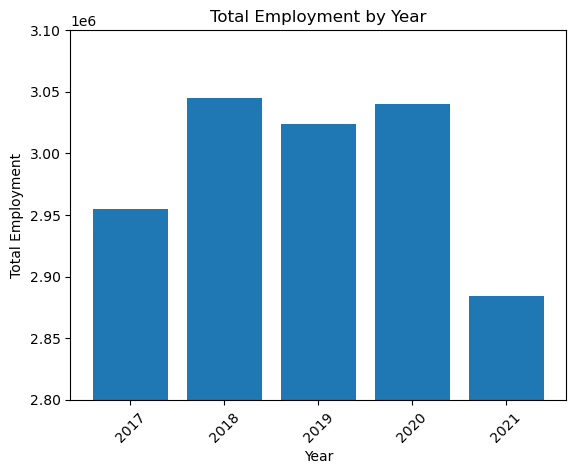

In [16]:
year_columns = ["2017","2018","2019","2020","2021"]
yearly_employment = [2954405,3045024,3023971,3040214,2883885] 
plt.bar(year_columns, yearly_employment)
plt.title('Total Employment by Year')
plt.xlabel('Year')
plt.ylabel('Total Employment')
plt.xticks(rotation=45)

# Zooms in on the graph around the 3,000,00 range
plt.ylim(2800000, 3100000)

plt.show()

### Of the all of the locations using combined statistical area the top 15 employement numbers in year ___ we can notice ____.

In [17]:
## Showcase with a visual

### How has overall employment changed from 2017 to 2021 across all locations?

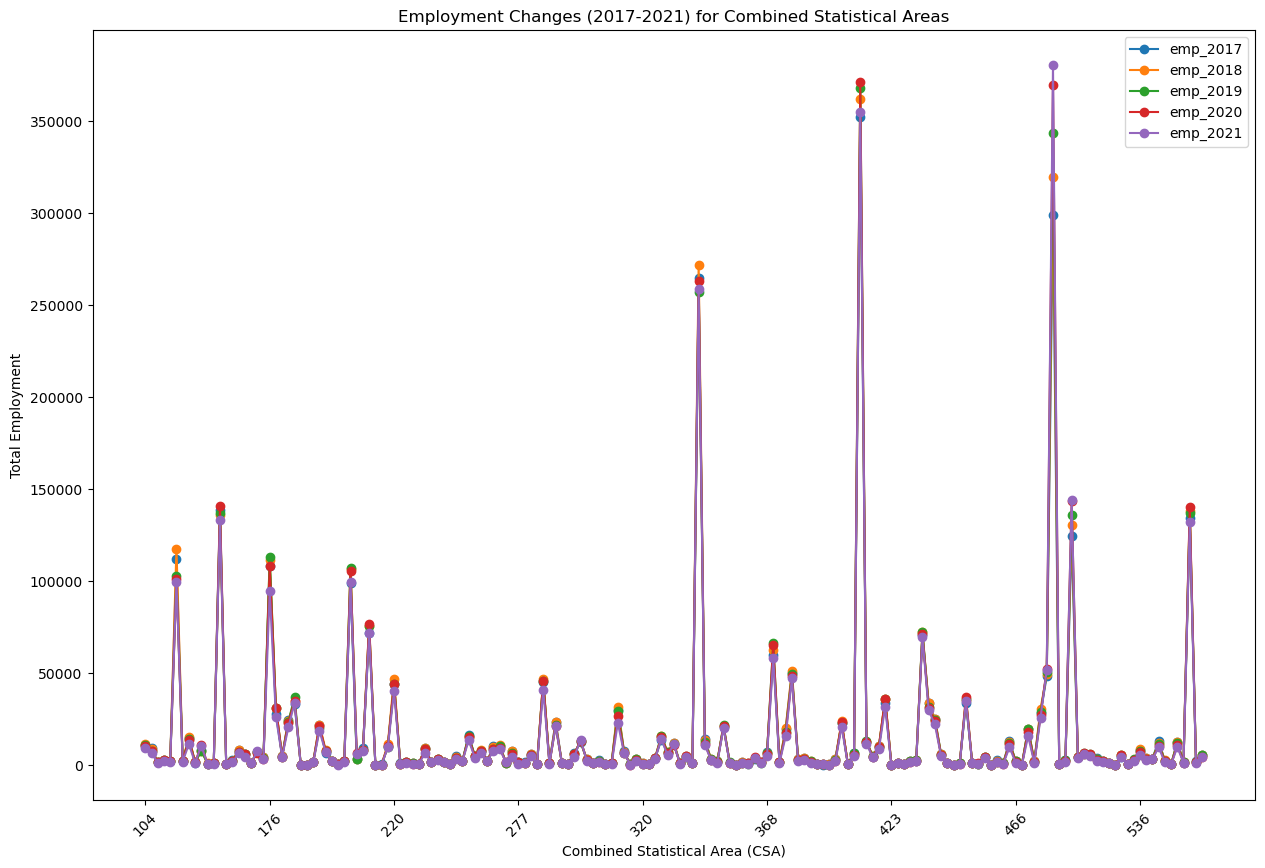

In [26]:
# Calculate total employment for each year
years = [f"emp_{year}" for year in range(2017, 2022)]
master_df[years] = master_df[years].astype(int)

# Create separate line charts for each year
plt.figure(figsize=(15, 10))


for year in years:
    plt.plot(master_df.index, master_df[year], marker='o', linestyle='-', label=year)

plt.title('Employment Changes (2017-2021) for Combined Statistical Areas')
plt.xlabel('Combined Statistical Area (CSA)')
plt.ylabel('Total Employment')
# Selects every 20th CSA Index and rotating the labels for better readability
plt.xticks(master_df.index[::20], master_df['CSA'][::20], rotation=45)
plt.legend()
plt.show()

### MAKE A NEW VISUAL BASED ON A MASK THAT MAKES A COPY OF THE DATAFRAME THAT REMOVES OUTLIERS BASED ON CERTAIN VALUE "< XXXXXXX" Then visualize it with a new visual

In [28]:
# Calculate the employment change from 2017 to 2021
master_df['emp_2017'] = master_df['emp_2017'].astype(int)
master_df['emp_2021'] = master_df['emp_2021'].astype(int)
master_df['emp_change'] = master_df['emp_2021'] - master_df['emp_2017']

In [27]:
# Group the data by CSA and calculate total employment change for each CSA
csa_data = master_df.groupby('CSA')['emp_change'].sum().reset_index()

# Find the CSA with the highest employment change
max_csa = csa_data.loc[csa_data['emp_change'].idxmax()]

# Filter the DataFrame for the locations in the CSA with the highest change
locations_in_max_csa = master_df[master_df['CSA'] == max_csa['CSA']]

# Display the employment change for the CSA with the highest change and its respective locations
print(f"Combined Statistical Area (CSA) ID with the Highest Employment Change: {max_csa['CSA']}")
print(f"Total Employment Change: {max_csa['emp_change']}")
print("Locations in this CSA:")
for _, location_row in locations_in_max_csa.iterrows():
    location_name = location_row['LOCATION']
    print(f"- {location_name}")

Combined Statistical Area (CSA) ID with the Highest Employment Change: 488
Total Employment Change: 81519
Locations in this CSA:
- San Jose-San Francisco-Oakland, CA CSA
